In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data

import mpld3

C:\Users\Student\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [4]:
##Sample = ['0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames', '0.02mgmlDNA_Buffer_49fps_20exp_8000frames','0.02mgmlDNA_Buffer_99fps_10exp_8000frames']

In [3]:
# different ROIs and the video number, change samNumber based upon the number of videos taken for the condition
ROI = ['0', '128', '256', '384', '512', '640']
samNumber = ['1','2']
R1_Diff = np.zeros(len(samNumber))
R2_Diff = np.zeros(len(samNumber))
R1_exp = np.zeros(len(samNumber))
R2_exp = np.zeros(len(samNumber))
newtaus = np.zeros(len(samNumber))
newtaustds = np.zeros(len(samNumber))
num = 0

In [48]:
# We only need to load this because of the dts
data_dir = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Tubulin\\2018_07_05\\2018_07_05_Tub11fps_1\\"
filename = data_dir.split('\\')[-2]
data_file = filename +"_MMStack_Pos0.ome_"+ROI[0]+"_BH_128x128_FFTDIFFS_dts_ravs.p"
dat = pickle.load(open(data_dir + data_file,'r'))
dts  = dat['dts']

In [49]:
newt = lambda t,s: (1./s)*gamma(1./s)*t
framerate = 11.0
px = 0.189
imDimension = 128
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
times = dts/framerate

In [51]:
ss = 0
#Load in the allResults file  
data_file = "AllResults.p"

Ana_data = pickle.load(open(data_dir + data_file, 'r'))

In [52]:
print Ana_data['fitparams256']

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.87552236e+03 8.05739286e+00 1.00000000e+02 7.64495965e-01
  0.00000000e+00 8.00000000e-01 1.00000000e+00]
 [1.74606590e+03 1.62361608e+01 1.00000000e+02 9.81864397e-01
  0.00000000e+00 8.00000000e-01 1.00000000e+00]
 [2.47059496e+03 2.83496467e+01 5.00000000e+00 5.41356310e-01
  0.00000000e+00 8.00000000e-01 1.00000000e+00]
 [1.81986243e+03 1.49007605e+01 5.00000000e+00 3.47434532e-01
  0.00000000e+00 8.00000000e-01 1.00000000e+00]
 [1.13743142e+03 6.78518896e+00 5.00000000e+00 5.69763972e-01
  0.00000000e+00 8.00000000e-01 1.00000000e+00]
 [7.99260223e+02 4.50858145e+00 3.64814298e+01 6.38382462e-01
  0.00000000e+00 8.00000000e-01 1.00000000e+00]
 [5.71716665e+02 3.58550967e+00 6.84107740e+01 6.99953029e-01
  0.00000000e+00 8.00000000e-01 1.00000000e+00]
 [4.24466681e+02 2.88320771e+00 6.97735609e+01 6.91670305e-01
  0.00000000e+00 8.00000000e-01 1.00000000e+00]
 [3.055288

(0.9, 15)

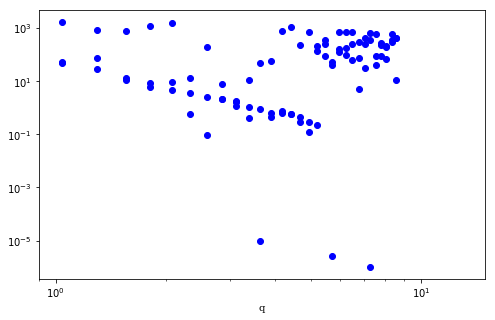

In [53]:
%matplotlib inline
mpld3.enable_notebook()

#This will plot all of the q vs tau for all of the ROIs in the   
tau = np.zeros([7,63]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
#fitparams = np.zeros([63,7])
for i in range(3):
    fitparams = Ana_data['fitparams'+ROI[i]]
    tau[i,:] = fitparams[:,1]
    amp[i,:] = fitparams[:,0]
    bg[i,:] = fitparams[:,2]
    alph[i,:] = fitparams[:,3]

fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
ax.set_xlabel("q", fontdict=font_plt_ax)

nt = np.zeros([7,31])
for i in range(7):
    nt[i] = ddm.newt(tau[i,2:-30],alph[i,2:-30])
    ax.loglog(q[3:-30], ddm.newt(tau[i,2:-30],alph[i,2:-30]),'bo')

ntav = np.mean(nt, axis=0)
ntstd = np.std(nt,axis=0)

ax.loglog(q[3:-30], ntav, 'rv')
ax.set_xlim(0.9,15)

In [54]:
newtaus[ss] = ntav
newtaustds[ss] = ntstd

ValueError: setting an array element with a sequence.

In [55]:
def DiffCoef (newtau_average, StretchExp, qrange, qmin, qmax):
    nt = newtau_average
    indx = (qrange>qmin) & (qrange<qmax)
    ds = (qrange[indx]**-2) / nt[indx]
    return ds.mean(), indx

def Diff_Fit(qrange, taurange, qmin, qmax, StExp, slope):
    step1 = DiffCoef(taurange, StExp, qrange, qmin, qmax)
    fit1 = (1./step1[0]) * 1./(qrange**slope)
    return fit1, step1[0], step1[1]

def getDiff(newtau_average, qs, qmin, qmax, power=0.5):
    w = np.where((qs>qmin)*(qs<qmax))
    pfit = np.polyfit(qs[w[0]], (1./newtau_average[w[0]])**power,1)
    return pfit
#Need to fix the function so the it will fit the data
#define a function to plot the results

def plot_results(qmin = q[2], qmax = q[10], slope = 2.0):
    qs = q[3:-30]
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(qs, ntav, 'ro')
    fits = Diff_Fit(qs, ntav, qmin, qmax, alph[2:-30], slope)
    ax.plot(qs, fits[0],  '-k')
    ax.text(0.55,0.8,'D = %.3f' %fits[1], 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.1f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel("Amplitude (red); Decay time (s)", fontdict=font_plt_ax)

In [56]:
#fit to the low q region
interact(plot_results, qmin = (q[0], q[5]), qmax = (q[5], q[10]), slope = (2.0,4.5), continuous_update=False)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNTE5NDQzMjI5NzYwMjE3MiwgZGVzY3JpcHRpb249dSdxbWluJywgbWF4PTEuMjk4NjA4MDc0NDAwNTQyOCksIEZsb2HigKY=


<function __main__.plot_results>

In [35]:
R1_Diff[ss] = 0.212
R1_exp[ss] = 2.3

In [36]:
#fit to the high q region
interact(plot_results, qmin = (q[4], q[7]), qmax = (q[7], q[13]), slope = (2.0,4.5), continuous_update=False)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMDM4ODg2NDU5NTIwNDM0MywgZGVzY3JpcHRpb249dSdxbWluJywgbWF4PTEuODE4MDUxMzA0MTYwNzYsIG1pbj0xLjDigKY=


<function __main__.plot_results>

In [37]:
R2_Diff[ss] = 0.253
R2_exp[ss] = 2.0

ValueError: x and y must have same first dimension, but have shapes (31L,) and (0L, 63L)

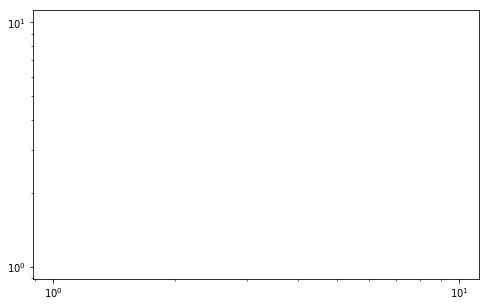

In [38]:
#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
ax.loglog(q[3:-30], ddm.newt(tau[2:-30],alph[2:-30]),'bo')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'rv')
diffusion_coeff = 0.25
ax.plot(q[3:-1], (1./diffusion_coeff) * 1./(q[3:-1]**2), '-k')
adiffusion_coeff = 0.25
ax.plot(q[3:-1], (1./adiffusion_coeff) * 1./(q[3:-1]**2.3), '--k')
ax.set_xlabel("q", fontdict=font_plt_ax)

In [39]:
logx = np.log(q[3:-30])
logy = np.log(ntav)
coeffs = np.polyfit(q[3:-30],ntav,deg=1)
coeffs


C:\Users\Student\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan])

In [ ]:
fig,ax = plt.subplots(figsize=(8,8/1.618))                        
ax.loglog(q[3:-50],yfit(q[3:-50]))
ax.loglog(q[3:-30], ntav, 'rv')

<Container object of 3 artists>

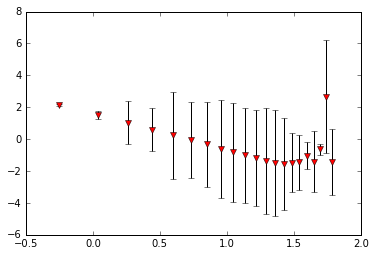

In [52]:
%matplotlib inline
mpld3.enable_notebook()

#fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
plt.errorbar(np.log(q[3:-40]), np.log(ntav[:-10]), yerr=np.log(ntstd[:-10]), xerr=None, fmt ='rv', ecolor = 'k')

In [ ]:
print AvgROIs
avgDiffCoeff = np.nanmean(AvgROIs)
stdev = np.nanstd(AvgROIs)
print "Averaged diffusion coefficient is: %.3f " % (avgDiffCoeff)
print "Standard deviation is: %.3f " % (stdev)
allResults['DiffCoeffROIs'] = AvgROIs
allResults['avgDiffCoeff'] = avgDiffCoeff
allResults['stdev'] = stdev